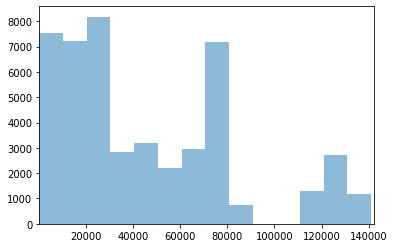

47376


In [23]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['vision_retries']

now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=12, days=200)
dummy_id = ObjectId.from_datetime(from_time)

pens = list(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}))
data = np.asarray([(now - pen['_id'].generation_time.replace(tzinfo=None)).total_seconds()/60 for pen in pens])


bin_minute = 60*24*7
bins = np.arange(0, max(data), bin_minute)

plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5, weights=(60 / bin_minute)*np.ones_like(data)*24*7)
plt.show()
print(len(pens))

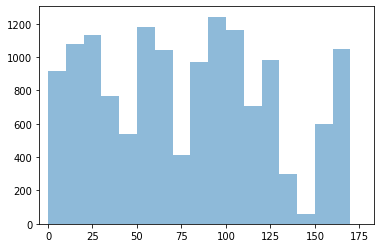

Duration: 2:58:22.182972
Total: 2473
Average Speed: 831 pen/hour
Average Cycle: 43.3 s


In [22]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['vision_retries']


now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=10)

dummy_id = ObjectId.from_datetime(from_time)

pens = list(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}))
data = np.asarray([(now - pen['_id'].generation_time.replace(tzinfo=None)).total_seconds()/60 for pen in pens])


bin_minute = 10
bins = np.arange(0, max(data), bin_minute)

plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5, weights=(60 / bin_minute)*np.ones_like(data))
plt.show()

duration = now - pens[0]['_id'].generation_time.replace(tzinfo=None)
average_speed = len(pens)/duration.total_seconds() * 3600
average_cycle = 3600 / average_speed * 10
print(f'Duration:',duration)
print(f'Total: {len(pens)}')
print(f'Average Speed: {int(average_speed)} pen/hour')
print(f'Average Cycle: {average_cycle:.01f} s')